# 🔄 Pre-Processing for Logistic Regression 💡
Let’s prepare the data before modeling — clean data = better results! 🧼✨

📚 1. Import Libraries
We load libraries like pandas, numpy, and sklearn for data handling and transformation. 🛠️

📥 2. Read Data
We load the dataset and take a quick look at structure and values. 👀

📊 3. Descriptive Stats
Basic stats like mean, min, max, and mode help us understand the data. 🧠

❓ 4. Handle Missing Values
We check for missing values and replace them if needed (mean, mode, etc.). 🚫

🎯 5. Create Target Variable
From the credit_score column:

If value is 'poor', set score = 1

Else, score = 0

This new score column is our binary target. ✅❌

⚙️ 6. WoE Transformation
We apply WoE to both numeric and categorical features. 📉

📈 7. Check Distributions
We review if features are normally distributed. 🔍

📌 8. Correlation
Keep:

Features with >10% correlation with target

Features with <70% correlation between each other

📊 This helps reduce redundancy.

🚀 9. Final Variables
Choose inputs (independent variables) and output (score) for the model. Done! 🤖✅

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix ,classification_report

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv(r'credit_score.csv')
data

,ID,CustomerID,Month,Name,Age,SSN,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,TypeofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore
0,0x1602,CUS0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,809.98,26.822620,No,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,Good
1,0x1603,CUS0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,809.98,31.944960,No,49.574949,118.280222,LowspentLargevaluepayments,284.629163,Good
2,0x1604,CUS0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,NaN,4.0,809.98,28.609352,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,Good
3,0x1605,CUS0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,809.98,31.377862,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,Good
4,0x1606,CUS0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,809.98,24.797347,No,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,0x25fe8,CUS0x942c,March,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,6.0,9.50,3.0,502.38,39.323569,No,35.104023,140.581403,HighspentMediumvaluepayments,410.256158,Poor
87491,0x25fe9,CUS0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7.0,11.50,3.0,502.38,34.663572,No,35.104023,60.971333,HighspentLargevaluepayments,479.866228,Poor
87492,0x25fea,CUS0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7.0,11.50,3.0,502.38,40.565631,No,35.104023,54.185950,HighspentMediumvaluepayments,496.651610,Poor
87493,0x25feb,CUS0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6.0,11.50,3.0,502.38,41.255522,No,35.104023,24.028477,HighspentLargevaluepayments,516.809083,Poor


In [3]:
data.describe(include = 'all')

,ID,CustomerID,Month,Name,Age,SSN,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,TypeofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore
count,87495,87495,87495,78779,87495.000000,87495,81317,8.749500e+04,74319.000000,87495.000000,87495.000000,87495.000000,87495.000000,77583,87495.000000,81400.000000,85654.000000,85789.000000,87495.000000,87495.000000,87495,87495.000000,79786.000000,87495,86437.000000,87495
unique,87495,12500,8,10139,NaN,12501,15,NaN,NaN,NaN,NaN,NaN,NaN,6260,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,7,NaN,3
top,0x1602,CUS0xd40,January,Langep,NaN,#F%$D@*&8,Lawyer,NaN,NaN,NaN,NaN,NaN,NaN,Not Specified,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,LowspentSmallvaluepayments,NaN,Standard
freq,1,8,10970,41,NaN,4857,5762,NaN,NaN,NaN,NaN,NaN,NaN,1208,NaN,NaN,NaN,NaN,NaN,NaN,45810,NaN,NaN,22237,NaN,46651
mean,NaN,NaN,NaN,NaN,110.467364,NaN,NaN,1.802404e+05,4193.181285,17.112646,22.664792,73.050871,7.019841,NaN,21.060403,30.904324,10.385851,27.734302,1426.716635,32.290526,NaN,1388.517947,195.482486,NaN,402.281023,NaN
std,NaN,NaN,NaN,NaN,686.549658,NaN,NaN,1.455212e+06,3179.195651,117.428586,129.806747,467.727237,60.352339,NaN,14.864558,225.495250,6.776714,193.011903,1155.824064,5.112418,NaN,8248.832131,199.357752,NaN,213.309331,NaN
min,NaN,NaN,NaN,NaN,-500.000000,NaN,NaN,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,0.000000,NaN,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,NaN,0.000000,0.000000,NaN,0.007760,NaN
25%,NaN,NaN,NaN,NaN,24.000000,NaN,NaN,1.943348e+04,1626.677917,3.000000,4.000000,8.000000,1.000000,NaN,10.000000,9.000000,5.340000,3.000000,566.400000,28.059063,NaN,30.453014,72.220853,NaN,270.107156,NaN
50%,NaN,NaN,NaN,NaN,33.000000,NaN,NaN,3.757975e+04,3095.905000,6.000000,5.000000,13.000000,3.000000,NaN,18.000000,14.000000,9.410000,6.000000,1166.230000,32.322206,NaN,69.285581,128.921405,NaN,336.698600,NaN
75%,NaN,NaN,NaN,NaN,42.000000,NaN,NaN,7.288608e+04,5967.930000,7.000000,7.000000,20.000000,5.000000,NaN,28.000000,18.000000,14.840000,9.000000,1948.980000,36.495606,NaN,161.405543,236.802042,NaN,470.180816,NaN


In [4]:
data.dtypes

ID                         object
CustomerID                 object
Month                      object
Name                       object
Age                         int64
SSN                        object
Occupation                 object
AnnualIncome              float64
MonthlyInhandSalary       float64
NumBankAccounts             int64
NumCreditCard               int64
InterestRate                int64
NumofLoan                   int64
TypeofLoan                 object
Delayfromduedate            int64
NumofDelayedPayment       float64
ChangedCreditLimit        float64
NumCreditInquiries        float64
OutstandingDebt           float64
CreditUtilizationRatio    float64
PaymentofMinAmount         object
TotalEMIpermonth          float64
Amountinvestedmonthly     float64
PaymentBehaviour           object
MonthlyBalance            float64
CreditScore                object
dtype: object

In [5]:
data.columns

Index(['ID', 'CustomerID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'AnnualIncome', 'MonthlyInhandSalary', 'NumBankAccounts',
       'NumCreditCard', 'InterestRate', 'NumofLoan', 'TypeofLoan',
       'Delayfromduedate', 'NumofDelayedPayment', 'ChangedCreditLimit',
       'NumCreditInquiries', 'OutstandingDebt', 'CreditUtilizationRatio',
       'PaymentofMinAmount', 'TotalEMIpermonth', 'Amountinvestedmonthly',
       'PaymentBehaviour', 'MonthlyBalance', 'CreditScore'],
      dtype='object')

In [6]:
data.drop(['ID','CustomerID','SSN','TypeofLoan'],axis=1)

,Month,Name,Age,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore
0,January,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,809.98,26.822620,No,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,Good
1,February,Aaron Maashoh,23,Scientist,19114.12,NaN,3,4,3,4,-1,NaN,11.27,4.0,809.98,31.944960,No,49.574949,118.280222,LowspentLargevaluepayments,284.629163,Good
2,March,Aaron Maashoh,-500,Scientist,19114.12,NaN,3,4,3,4,3,7.0,NaN,4.0,809.98,28.609352,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,Good
3,April,Aaron Maashoh,23,Scientist,19114.12,NaN,3,4,3,4,5,4.0,6.27,4.0,809.98,31.377862,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,Good
4,May,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,6,NaN,11.27,4.0,809.98,24.797347,No,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,March,Nicks,25,Mechanic,39628.99,3359.415833,4,6,7,2,20,6.0,9.50,3.0,502.38,39.323569,No,35.104023,140.581403,HighspentMediumvaluepayments,410.256158,Poor
87491,April,Nicks,25,Mechanic,39628.99,3359.415833,4,6,7,2,23,7.0,11.50,3.0,502.38,34.663572,No,35.104023,60.971333,HighspentLargevaluepayments,479.866228,Poor
87492,May,Nicks,25,Mechanic,39628.99,3359.415833,4,6,7,2,18,7.0,11.50,3.0,502.38,40.565631,No,35.104023,54.185950,HighspentMediumvaluepayments,496.651610,Poor
87493,June,Nicks,25,Mechanic,39628.99,3359.415833,4,6,5729,2,27,6.0,11.50,3.0,502.38,41.255522,No,35.104023,24.028477,HighspentLargevaluepayments,516.809083,Poor


In [7]:
data['score'] = np.where(data['CreditScore']=='Poor',1,0)
data

,ID,CustomerID,Month,Name,Age,SSN,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,TypeofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore,score
0,0x1602,CUS0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,809.98,26.822620,No,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,Good,0
1,0x1603,CUS0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,809.98,31.944960,No,49.574949,118.280222,LowspentLargevaluepayments,284.629163,Good,0
2,0x1604,CUS0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,NaN,4.0,809.98,28.609352,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,Good,0
3,0x1605,CUS0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,809.98,31.377862,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,Good,0
4,0x1606,CUS0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,809.98,24.797347,No,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,Good,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,0x25fe8,CUS0x942c,March,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,6.0,9.50,3.0,502.38,39.323569,No,35.104023,140.581403,HighspentMediumvaluepayments,410.256158,Poor,1
87491,0x25fe9,CUS0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7.0,11.50,3.0,502.38,34.663572,No,35.104023,60.971333,HighspentLargevaluepayments,479.866228,Poor,1
87492,0x25fea,CUS0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7.0,11.50,3.0,502.38,40.565631,No,35.104023,54.185950,HighspentMediumvaluepayments,496.651610,Poor,1
87493,0x25feb,CUS0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6.0,11.50,3.0,502.38,41.255522,No,35.104023,24.028477,HighspentLargevaluepayments,516.809083,Poor,1


In [8]:
data['score'].value_counts()

score
0    62145
1    25350
Name: count, dtype: int64

In [9]:
data.drop(['CreditScore'],axis=1)

,ID,CustomerID,Month,Name,Age,SSN,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,TypeofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,score
0,0x1602,CUS0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,809.98,26.822620,No,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,0
1,0x1603,CUS0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,809.98,31.944960,No,49.574949,118.280222,LowspentLargevaluepayments,284.629163,0
2,0x1604,CUS0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,NaN,4.0,809.98,28.609352,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,0
3,0x1605,CUS0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,809.98,31.377862,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,0
4,0x1606,CUS0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,809.98,24.797347,No,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,0x25fe8,CUS0x942c,March,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,6.0,9.50,3.0,502.38,39.323569,No,35.104023,140.581403,HighspentMediumvaluepayments,410.256158,1
87491,0x25fe9,CUS0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7.0,11.50,3.0,502.38,34.663572,No,35.104023,60.971333,HighspentLargevaluepayments,479.866228,1
87492,0x25fea,CUS0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7.0,11.50,3.0,502.38,40.565631,No,35.104023,54.185950,HighspentMediumvaluepayments,496.651610,1
87493,0x25feb,CUS0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6.0,11.50,3.0,502.38,41.255522,No,35.104023,24.028477,HighspentLargevaluepayments,516.809083,1


In [10]:
data.isnull().sum()

ID                            0
CustomerID                    0
Month                         0
Name                       8716
Age                           0
SSN                           0
Occupation                 6178
AnnualIncome                  0
MonthlyInhandSalary       13176
NumBankAccounts               0
NumCreditCard                 0
InterestRate                  0
NumofLoan                     0
TypeofLoan                 9912
Delayfromduedate              0
NumofDelayedPayment        6095
ChangedCreditLimit         1841
NumCreditInquiries         1706
OutstandingDebt               0
CreditUtilizationRatio        0
PaymentofMinAmount            0
TotalEMIpermonth              0
Amountinvestedmonthly      7709
PaymentBehaviour              0
MonthlyBalance             1058
CreditScore                   0
score                         0
dtype: int64

In [12]:
for i in data.columns:
    if data[i].dtypes==object:
        data[i]=data[i].fillna(data[i].mode()[0])
    else:
        data[i]=data[i].fillna(data[i].mean())

data


,ID,CustomerID,Month,Name,Age,SSN,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,TypeofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore,score
0,0x1602,CUS0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.000000,11.270000,4.0,809.98,26.822620,No,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,Good,0
1,0x1603,CUS0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4193.181285,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,30.904324,11.270000,4.0,809.98,31.944960,No,49.574949,118.280222,LowspentLargevaluepayments,284.629163,Good,0
2,0x1604,CUS0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,4193.181285,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.000000,10.385851,4.0,809.98,28.609352,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,Good,0
3,0x1605,CUS0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4193.181285,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.000000,6.270000,4.0,809.98,31.377862,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,Good,0
4,0x1606,CUS0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,30.904324,11.270000,4.0,809.98,24.797347,No,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,Good,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,0x25fe8,CUS0x942c,March,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,6.000000,9.500000,3.0,502.38,39.323569,No,35.104023,140.581403,HighspentMediumvaluepayments,410.256158,Poor,1
87491,0x25fe9,CUS0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7.000000,11.500000,3.0,502.38,34.663572,No,35.104023,60.971333,HighspentLargevaluepayments,479.866228,Poor,1
87492,0x25fea,CUS0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7.000000,11.500000,3.0,502.38,40.565631,No,35.104023,54.185950,HighspentMediumvaluepayments,496.651610,Poor,1
87493,0x25feb,CUS0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6.000000,11.500000,3.0,502.38,41.255522,No,35.104023,24.028477,HighspentLargevaluepayments,516.809083,Poor,1


In [13]:
for i in data.columns:
    if data[i].dtypes!= object:
        print(i)

Age
AnnualIncome
MonthlyInhandSalary
NumBankAccounts
NumCreditCard
InterestRate
NumofLoan
Delayfromduedate
NumofDelayedPayment
ChangedCreditLimit
NumCreditInquiries
OutstandingDebt
CreditUtilizationRatio
TotalEMIpermonth
Amountinvestedmonthly
MonthlyBalance
score


In [15]:
for i in data.columns:
    if data[i].dtypes==object:
        print(i)

ID
CustomerID
Month
Name
SSN
Occupation
TypeofLoan
PaymentofMinAmount
PaymentBehaviour
CreditScore


In [20]:
for var in data.columns[:-1]:
    if data[var].dtypes!= object:

        q1=data[var].quantile(0.25)
        q2=data[var].quantile(0.5)
        q3=data[var].quantile(0.75)

        ranges = (-np.inf,q1,q2,q3,np.inf)
        data['category_'+ var]=pd.cut(data[var],bins=ranges,duplicates = 'drop')

        grouped = data.groupby(['category_' + var, 'score'])['score'].count().unstack().reset_index()

        grouped['positive_prop'] = grouped[0] / grouped[0].sum()
        grouped['negative_prop'] = grouped[1] / grouped[1].sum()

        grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])
        
        grouped.rename(columns={'woe': var + '_woe'}, inplace=True)
        data = data.merge(grouped[['category_' + var, var + '_woe']], how='left', on='category_' + var)
        
data

C:\Users\NIcat\AppData\Local\Temp\ipykernel_11384\535446246.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(['category_' + var, 'score'])['score'].count().unstack().reset_index()
C:\Users\NIcat\AppData\Local\Temp\ipykernel_11384\535446246.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(['category_' + var, 'score'])['score'].count().unstack().reset_index()
C:\Users\NIcat\AppData\Local\Temp\ipykernel_11384\535446246.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=Fal

,ID,CustomerID,Month,Name,Age,SSN,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,TypeofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore,score,category_Age,Age_woe,category_AnnualIncome,AnnualIncome_woe,category_MonthlyInhandSalary,MonthlyInhandSalary_woe,category_NumBankAccounts,NumBankAccounts_woe,category_NumCreditCard,NumCreditCard_woe,category_InterestRate,InterestRate_woe,category_NumofLoan,NumofLoan_woe,category_Delayfromduedate,Delayfromduedate_woe,category_NumofDelayedPayment,NumofDelayedPayment_woe,category_ChangedCreditLimit,ChangedCreditLimit_woe,category_NumCreditInquiries,NumCreditInquiries_woe,category_OutstandingDebt,OutstandingDebt_woe,category_CreditUtilizationRatio,CreditUtilizationRatio_woe,category_TotalEMIpermonth,TotalEMIpermonth_woe,category_Amountinvestedmonthly,Amountinvestedmonthly_woe,category_MonthlyBalance,MonthlyBalance_woe
0,0x1602,CUS0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.000000,11.270000,4.0,809.98,26.822620,No,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,Good,0,"(-inf, 24.0]",-0.221890,"(-inf, 19433.48]",-0.544667,"(1792.52, 3860.632]",0.163879,"(-inf, 3.0]",0.775176,"(-inf, 4.0]",1.077752,"(-inf, 8.0]",0.963156,"(3.0, 5.0]",-0.105828,"(-inf, 10.0]",1.050763,"(-inf, 9.0]",0.651120,"(9.56, 14.64]",0.131787,"(3.0, 6.0]",0.558452,"(566.4, 1166.23]",1.209568,"(-inf, 28.059]",-0.085018,"(30.453, 69.286]",-0.143113,"(76.962, 143.313]",-0.124014,"(270.918, 338.591]",-0.237030
1,0x1603,CUS0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4193.181285,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,30.904324,11.270000,4.0,809.98,31.944960,No,49.574949,118.280222,LowspentLargevaluepayments,284.629163,Good,0,"(-inf, 24.0]",-0.221890,"(-inf, 19433.48]",-0.544667,"(3860.632, 5376.237]",-0.157230,"(-inf, 3.0]",0.775176,"(-inf, 4.0]",1.077752,"(-inf, 8.0]",0.963156,"(3.0, 5.0]",-0.105828,"(-inf, 10.0]",1.050763,"(19.0, inf]",-0.642278,"(9.56, 14.64]",0.131787,"(3.0, 6.0]",0.558452,"(566.4, 1166.23]",1.209568,"(28.059, 32.322]",-0.013608,"(30.453, 69.286]",-0.143113,"(76.962, 143.313]",-0.124014,"(270.918, 338.591]",-0.237030
2,0x1604,CUS0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,4193.181285,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.000000,10.385851,4.0,809.98,28.609352,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,Good,0,"(-inf, 24.0]",-0.221890,"(-inf, 19433.48]",-0.544667,"(3860.632, 5376.237]",-0.157230,"(-inf, 3.0]",0.775176,"(-inf, 4.0]",1.077752,"(-inf, 8.0]",0.963156,"(3.0, 5.0]",-0.105828,"(-inf, 10.0]",1.050763,"(-inf, 9.0]",0.651120,"(9.56, 14.64]",0.131787,"(3.0, 6.0]",0.558452,"(566.4, 1166.23]",1.209568,"(28.059, 32.322]",-0.013608,"(30.453, 69.286]",-0.143113,"(76.962, 143.313]",-0.124014,"(270.918, 338.591]",-0.237030
3,0x1605,CUS0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4193.181285,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.000000,6.270000,4.0,809.98,31.377862,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,Good,0,"(-inf, 24.0]",-0.221890,"(-inf, 19433.48]",-0.544667,"(3860.632, 5376.237]",-0.157230,"(-inf, 3.0]",0.775176,"(-inf, 4.0]",1.077752,"(-inf, 8.0]",0.963156,"(3.0, 5.0]",-0.105828,"(-inf, 10.0]",1.050763,"(-inf, 9.0]",0.651120,"(5.425, 9.56]",0.039621,"(3.0, 6.0]",0.558452,"(566.4, 1166.23]",1.209568,"(28.059, 32.322]",-0.013608,"(30.453, 69.286]",-0.143113,"(143.313, 219.931]",0.015442,"(-inf, 270.918]",-0.489969
4,0x1606,CUS0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,30.904324,11.270000,4.0,809.98,24.797347,No,49.574949,41.420153,Hi

In [25]:
from scipy import stats


for i in data.columns:
    if data[i].dtype in ['int64', 'float64']:
        kstest_statistic, kstest_p_value = stats.kstest(data[i], 'norm')
        print(f'Column: {i}')
        print(f'p-value: {kstest_p_value}')
        
        if kstest_p_value > 0.05:
            print('Data looks normally distributed')
            print()
        else:
            print('Data does not look normally distributed')
            print()

Column: Age
p-value: 0.0
Data does not look normally distributed

Column: AnnualIncome
p-value: 0.0
Data does not look normally distributed

Column: MonthlyInhandSalary
p-value: 0.0
Data does not look normally distributed

Column: NumBankAccounts
p-value: 0.0
Data does not look normally distributed

Column: NumCreditCard
p-value: 0.0
Data does not look normally distributed

Column: InterestRate
p-value: 0.0
Data does not look normally distributed

Column: NumofLoan
p-value: 0.0
Data does not look normally distributed

Column: Delayfromduedate
p-value: 0.0
Data does not look normally distributed

Column: NumofDelayedPayment
p-value: 0.0
Data does not look normally distributed

Column: ChangedCreditLimit
p-value: 0.0
Data does not look normally distributed

Column: NumCreditInquiries
p-value: 0.0
Data does not look normally distributed

Column: OutstandingDebt
p-value: 0.0
Data does not look normally distributed

Column: CreditUtilizationRatio
p-value: 0.0
Data does not look normally dis

In [29]:
def target_correlation(data,target,threshold = 0.1):
    woe_features=data.filter(regex= '_woe$',axis=1)
    woe_features[target]=data[target]

    corr_matrix = woe_features.corr(method = 'spearman')

    target_correlations = corr_matrix[target].abs() > threshold
    variables_explaining_target = target_correlations[target_correlations].index.tolist()
    variables_explaining_target.remove(target)
    
    result_explaining_target = pd.DataFrame(
    {'Variable': variables_explaining_target,
    'Correlation with Target': corr_matrix.loc[variables_explaining_target, target]})
    
    result_explaining_target.reset_index(drop=True, inplace=True)
    return result_explaining_target


target_result = target_correlation(data, 'score')

target_result

C:\Users\NIcat\AppData\Local\Temp\ipykernel_11384\3683641342.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  woe_features[target]=data[target]


,Variable,Correlation with Target
0,Age_woe,-0.102439
1,AnnualIncome_woe,-0.199462
2,MonthlyInhandSalary_woe,-0.174459
3,NumBankAccounts_woe,-0.262026
4,NumCreditCard_woe,-0.314837
5,InterestRate_woe,-0.406848
6,NumofLoan_woe,-0.287626
7,Delayfromduedate_woe,-0.338427
8,NumofDelayedPayment_woe,-0.222047
9,NumCreditInquiries_woe,-0.360778


In [30]:
target_result.Variable.tolist()

['Age_woe',
 'AnnualIncome_woe',
 'MonthlyInhandSalary_woe',
 'NumBankAccounts_woe',
 'NumCreditCard_woe',
 'InterestRate_woe',
 'NumofLoan_woe',
 'Delayfromduedate_woe',
 'NumofDelayedPayment_woe',
 'NumCreditInquiries_woe',
 'OutstandingDebt_woe',
 'MonthlyBalance_woe']

In [31]:
def intercorrelation(data,target,threshold = 0.7):
    woe_features=data.filter(regex = '_woe$',axis = 1)
    corr_matrix = woe_features.corr(method = 'spearman')
    highly_correlated_variables = (np.abs(corr_matrix) > threshold) & (corr_matrix != 1.0)
    independent_variable_pairs = np.where(highly_correlated_variables)
    correlated_pairs_set = set()
    for var1 ,var2 in zip(independent_variable_pairs[0], independent_variable_pairs[1]):
        if var1<var2:
            correlated_pairs_set.add((corr_matrix.index[var1],corr_matrix.columns[var2]))
        else:
            correlated_pairs_set.add((corr_matrix.index[var2],corr_matrix.columns[var1]))

    result_intercorrelated_independent = pd.DataFrame(list(correlated_pairs_set), columns=['Variable 1', 'Variable 2'])
    
    return result_intercorrelated_independent
        

In [32]:
intercorrelated_result= intercorrelation(data,'score')
intercorrelated_result

,Variable 1,Variable 2
0,AnnualIncome_woe,MonthlyInhandSalary_woe


In [34]:
x=data[['Age_woe',
 'AnnualIncome_woe',
 'MonthlyInhandSalary_woe',
 'NumBankAccounts_woe',
 'NumCreditCard_woe',
 'InterestRate_woe',
 'NumofLoan_woe',
 'Delayfromduedate_woe',
 'NumofDelayedPayment_woe',
 'NumCreditInquiries_woe',
 'OutstandingDebt_woe',
 'MonthlyBalance_woe']]
y=data['score']

# 🤖 Modeling the Logistic Regression Model 💥
Time to build, train, and evaluate the model! 🚀

🧪 1. Train-Test Split
We split the data into training and testing sets using test_size=0.3.
This helps evaluate performance on unseen data. 🔄

🧠 2. Build Logistic Regression Model
We train a logistic regression model using the training data. Simple and effective! ✔️

🧾 3. Evaluation Function
We create a function to compute:

Confusion matrix 📉

AUC score 🎯

Gini coefficient 📊

📈 4. Model Evaluation
We use our function to check how well the model performs using the test set.
Key metrics: Gini, AUC, and confusion matrix. ✅❌

🧩 5. ROC Curve
We plot the ROC curve for visualizing model performance and Gini score. 📉📊

🎯 6. Precision & Recall
We plot precision vs. recall to find the best balance point — very helpful in binary classification. ⚖️

In [36]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [37]:
from sklearn.metrics import precision_score,recall_score,roc_auc_score

def evaluate(model, X_train, y_train, X_test, y_test):

    
    y_train_pred = model.predict(X_train)
    y_train_prob = model.predict_proba(X_train)[:, 1]

    
    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:, 1]

    
    roc_train_prob = roc_auc_score(y_train, y_train_prob)
    gini_train_prob = roc_train_prob * 2 - 1
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)

    
    roc_test_prob = roc_auc_score(y_test, y_test_prob)
    gini_test_prob = roc_test_prob * 2 - 1
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)

    results = pd.DataFrame({
        'Dataset': ['Train', 'Test'],
        'Gini': [gini_train_prob * 100, gini_test_prob * 100],
        'Precision': [precision_train, precision_test],
        'Recall': [recall_train, recall_test]
    })


    confusion_matrix = metrics.confusion_matrix(y_test,y_test_pred)
    return results,confusion_matrix

In [38]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [40]:
result = evaluate(clf, X_train, y_train, X_test, y_test)

result

(  Dataset       Gini  Precision    Recall
 0   Train  57.920980   0.633448  0.580437
 1    Test  57.197105   0.628506  0.576767,
 array([[15987,  2609],
        [ 3239,  4414]], dtype=int64))

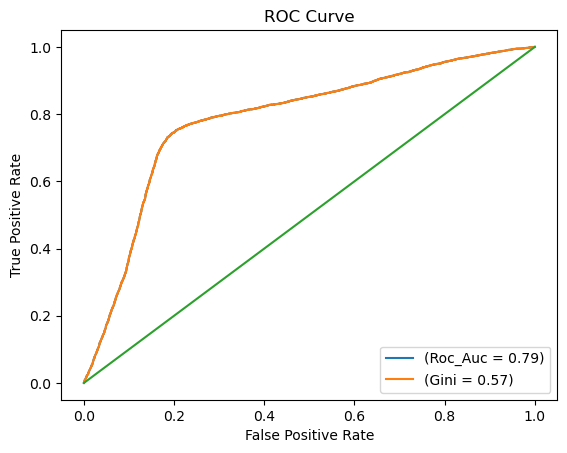

In [41]:
y_prob = clf.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test,y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr,tpr,thresholds = roc_curve(y_test,y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()


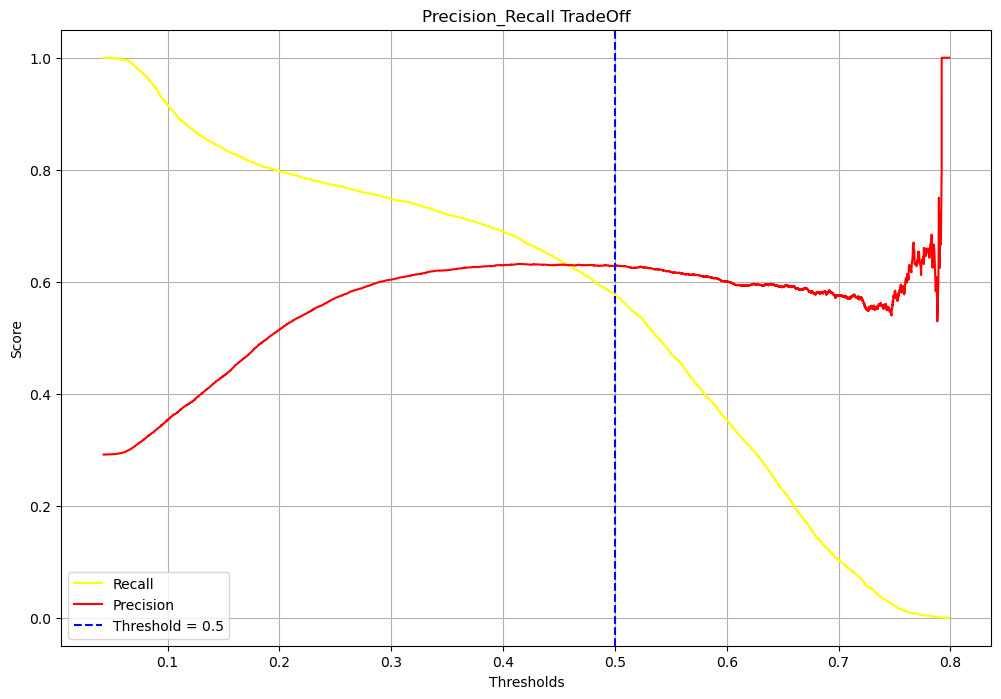

In [45]:
from sklearn.metrics import precision_recall_curve
y_prob = clf.predict_proba(X_test)[:,1]
precision,recall,thresholds = precision_recall_curve(y_test,y_prob)

plt.figure(figsize = (12,8))
plt.plot(thresholds,recall[:-1],label ='Recall',color='yellow')
plt.plot(thresholds,precision[:-1],label = 'Precision',color = 'red')
plt.xlabel('Thresholds')
plt.ylabel('Score')
plt.title('Precision_Recall TradeOff')
plt.axvline(x = 0.5,color='blue',linestyle = '--',label = 'Threshold = 0.5')
plt.legend()
plt.grid(True)
plt.show()

# 📊 Univariate Gini Analysis
For each variable, show the Gini score on both the train and test sets.
This helps identify how well each feature performs individually. 🎯

In [53]:
variables = []
train_gini_scores = []
test_gini_scores = []

for i in X_train.columns:
    X_train_single_var = X_train[[i]]
    X_test_single_var = X_test[[i]]

    clf.fit(X_train_single_var,y_train)
    y_pred_train_single_var = clf.predict_proba(X_train_single_var)[:, 1]
    train_roc = roc_auc_score(y_train , y_pred_train_single_var)
    train_gini = 2*train_roc - 1

    y_pred_test_single_var = clf.predict_proba(X_test_single_var)[:,1]
    test_roc = roc_auc_score(y_test , y_pred_test_single_var)
    test_gini = 2*test_roc - 1

    variables.append(i)
    train_gini_scores.append(train_gini)
    test_gini_scores.append(test_gini)


results_df = pd.DataFrame({
                            'Variable': variables,
                            'Train Gini': train_gini_scores,
                            'Test Gini': test_gini_scores
                        })

results_df_sorted = results_df.sort_values(by='Test Gini', ascending=False)

pd.options.display.float_format = '{:.4f}'.format

results_df_sorted


,Variable,Train Gini,Test Gini
10,OutstandingDebt_woe,0.5153,0.5117
5,InterestRate_woe,0.5002,0.5011
9,NumCreditInquiries_woe,0.4459,0.4376
7,Delayfromduedate_woe,0.4229,0.4030
4,NumCreditCard_woe,0.3885,0.3752
6,NumofLoan_woe,0.3542,0.3531
3,NumBankAccounts_woe,0.3173,0.3229
8,NumofDelayedPayment_woe,0.2730,0.2740
1,AnnualIncome_woe,0.2478,0.2412
11,MonthlyBalance_woe,0.2372,0.2362


# 📊 Selected Variables for New Model
In the Univariate analysis, we keep variables with a Gini score above 40% from the test set and build a new model based on these selected features. 🎯

In [55]:
x1=data[['Delayfromduedate_woe','NumCreditInquiries_woe','InterestRate_woe','OutstandingDebt_woe']]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, random_state=42)

In [57]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [58]:
result = evaluate(clf, X_train, y_train, X_test, y_test)

result

(  Dataset    Gini  Precision  Recall
 0   Train 56.6131     0.6300  0.5831
 1    Test 55.9434     0.6268  0.5809,
 array([[15949,  2647],
        [ 3207,  4446]], dtype=int64))

# 🚀 Deployment with WOE
Deploy the model on the provided prod_data_with_woe dataset! 🖥️

📊 Predict Default Probability (PD)
Use model.predict_proba() to show the probability of customers defaulting (PD). This helps predict the likelihood of default. 💡

In [60]:
df = pd.read_excel(r'prod_data_with_woe.xlsx')

df

,Unnamed: 0,Age_woe,AnnualIncome_woe,MonthlyInhandSalary_woe,NumBankAccounts_woe,NumCreditCard_woe,InterestRate_woe,NumofLoan_woe,Delayfromduedate_woe,NumofDelayedPayment_woe,NumCreditInquiries_woe,OutstandingDebt_woe,MonthlyBalance_woe,PaymentofMinAmount_woe,PaymentBehaviour_woe
0,66072,-0.1156,0.6777,0.6042,0.3233,0.0409,-0.0280,-0.1058,-1.0948,0.3325,1.1029,-0.3521,0.6836,0.9738,0.3910
1,6931,-0.1156,0.2314,-0.4757,0.3233,0.0409,-0.0280,0.3208,-0.1009,-0.2813,0.5585,-0.3521,-0.2370,-0.4725,-0.0706
2,3064,-0.0589,-0.1881,0.1639,0.7752,0.0409,-1.3762,0.9065,1.0508,0.6511,0.5585,-0.3521,0.6836,0.9738,0.1827
3,9134,-0.2219,0.2314,0.1639,-0.7832,-1.2249,-0.0280,0.3208,0.4968,0.3325,-1.0683,-1.2232,-0.4900,-0.4725,-0.3158
4,47254,-0.1156,-0.1881,-0.1572,-0.7832,0.0409,-1.3762,-0.1058,-1.0948,-0.6423,-0.4761,-1.2232,0.6836,-0.0110,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,52892,-0.2219,0.2314,-0.1572,-0.3802,-1.2249,-0.0280,-0.1058,-1.0948,-0.6423,-1.0683,-1.2232,0.2145,-0.4725,-0.3158
796,53553,0.4878,-0.1881,0.1639,0.3233,-0.0785,0.9632,0.3208,1.0508,-0.2813,1.1029,-0.3521,0.2145,-0.0110,0.3910
797,39282,-0.2219,-0.1881,-0.1572,-0.7832,-0.0785,-1.3762,-0.9635,-1.0948,-0.6423,-0.4761,-1.2232,-0.2370,-0.4725,-0.0034
798,53283,-0.0589,-0.5447,-0.4757,0.3233,-1.2249,-0.0280,0.9065,-0.1009,-0.2813,-0.4761,-1.2232,-0.4900,-0.0110,-0.3158


In [61]:
df.describe(include = 'all')

,Unnamed: 0,Age_woe,AnnualIncome_woe,MonthlyInhandSalary_woe,NumBankAccounts_woe,NumCreditCard_woe,InterestRate_woe,NumofLoan_woe,Delayfromduedate_woe,NumofDelayedPayment_woe,NumCreditInquiries_woe,OutstandingDebt_woe,MonthlyBalance_woe,PaymentofMinAmount_woe,PaymentBehaviour_woe
count,800.0000,800.0000,800.0000,800.0000,800.0000,800.0000,800.0000,800.0000,800.0000,800.0000,800.0000,800.0000,800.0000,800.0000,800.0000
mean,44081.6537,0.0198,0.0451,0.0416,0.0816,0.1189,0.1489,0.0776,0.1327,0.0316,0.1280,0.1972,0.0731,0.0623,0.0149
std,24862.6311,0.2706,0.4545,0.4037,0.6004,0.7719,0.9885,0.6614,0.7732,0.5054,0.8627,1.0499,0.4493,0.6541,0.2390
min,11.0000,-0.2219,-0.5447,-0.4757,-0.7832,-1.2249,-1.3762,-0.9635,-1.0948,-0.6423,-1.0683,-1.2232,-0.4900,-0.4725,-0.3158
25%,23164.0000,-0.1156,-0.1881,-0.1572,-0.7832,-0.0785,-0.0280,-0.1058,-0.1009,-0.6423,-0.4761,-0.3521,-0.2370,-0.4725,-0.3158
50%,44248.5000,-0.0589,-0.1881,-0.1572,0.3233,-0.0188,-0.0280,0.3208,-0.1009,0.3325,0.5585,-0.3521,0.2145,-0.4725,0.0577
75%,65864.7500,-0.0589,0.2314,0.6042,0.7752,1.0778,0.9632,0.3208,1.0508,0.3325,1.1029,1.2096,0.6836,0.9738,0.1827
max,87343.0000,0.4878,0.6777,0.6042,0.7752,1.0778,1.1494,0.9065,1.0508,0.6511,1.1029,1.2719,0.6836,0.9738,0.3910


In [62]:
df.columns

Index(['Unnamed: 0', 'Age_woe', 'AnnualIncome_woe', 'MonthlyInhandSalary_woe',
       'NumBankAccounts_woe', 'NumCreditCard_woe', 'InterestRate_woe',
       'NumofLoan_woe', 'Delayfromduedate_woe', 'NumofDelayedPayment_woe',
       'NumCreditInquiries_woe', 'OutstandingDebt_woe', 'MonthlyBalance_woe',
       'PaymentofMinAmount_woe', 'PaymentBehaviour_woe'],
      dtype='object')

In [63]:
df.rename(columns={'Unnamed: 0': 'CustomerID'}, inplace=True)

In [64]:
x1.columns

Index(['Delayfromduedate_woe', 'NumCreditInquiries_woe', 'InterestRate_woe',
       'OutstandingDebt_woe'],
      dtype='object')

In [65]:
df = df[['CustomerID','Delayfromduedate_woe', 'NumCreditInquiries_woe', 'InterestRate_woe',
       'OutstandingDebt_woe']]
df

,CustomerID,Delayfromduedate_woe,NumCreditInquiries_woe,InterestRate_woe,OutstandingDebt_woe
0,66072,-1.0948,1.1029,-0.0280,-0.3521
1,6931,-0.1009,0.5585,-0.0280,-0.3521
2,3064,1.0508,0.5585,-1.3762,-0.3521
3,9134,0.4968,-1.0683,-0.0280,-1.2232
4,47254,-1.0948,-0.4761,-1.3762,-1.2232
...,...,...,...,...,...
795,52892,-1.0948,-1.0683,-0.0280,-1.2232
796,53553,1.0508,1.1029,0.9632,-0.3521
797,39282,-1.0948,-0.4761,-1.3762,-1.2232
798,53283,-0.1009,-0.4761,-0.0280,-1.2232


In [66]:
df['pred']=clf.predict_proba(df.iloc[:,1:])[:,1]


C:\Users\NIcat\AppData\Local\Temp\ipykernel_11384\3541974982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pred']=clf.predict_proba(df.iloc[:,1:])[:,1]


In [67]:
df

,CustomerID,Delayfromduedate_woe,NumCreditInquiries_woe,InterestRate_woe,OutstandingDebt_woe,pred
0,66072,-1.0948,1.1029,-0.0280,-0.3521,0.3352
1,6931,-0.1009,0.5585,-0.0280,-0.3521,0.3050
2,3064,1.0508,0.5585,-1.3762,-0.3521,0.3587
3,9134,0.4968,-1.0683,-0.0280,-1.2232,0.4700
4,47254,-1.0948,-0.4761,-1.3762,-1.2232,0.6796
...,...,...,...,...,...,...
795,52892,-1.0948,-1.0683,-0.0280,-1.2232,0.5838
796,53553,1.0508,1.1029,0.9632,-0.3521,0.1512
797,39282,-1.0948,-0.4761,-1.3762,-1.2232,0.6796
798,53283,-0.1009,-0.4761,-0.0280,-1.2232,0.4729


# 🚀 Deployment with Real Values
We deploy the trained model using the provided file: test_data_real_values.xlsx 📂

# 🔍 Predicting Default Probabilities (PD)
For each customer in the test data, we calculate their probability of default (PD) using the model. 📉💳

This gives a clear view of risk levels for real-world cases! 🎯

In [69]:
test_data = pd.read_excel(r'test_data_real_values.xlsx')

test_data

,OutstandingDebt,InterestRate,NumCreditInquiries,Delayfromduedate,CustomerID
0,632.9300,17,0,20,53115
1,3259.1700,24,11,53,35538
2,2313.6000,22,11,55,15150
3,556.8500,16,8,23,65145
4,1115.0600,6,3,16,23224
...,...,...,...,...,...
995,1360.3100,11,8,6,86109
996,1213.2600,11,6,22,62411
997,1509.7200,27,11,18,5554
998,356.6900,18,9,25,70288


In [70]:
data.category_OutstandingDebt.value_counts()

category_OutstandingDebt
(1166.23, 1948.98]    21881
(-inf, 566.4]         21880
(566.4, 1166.23]      21873
(1948.98, inf]        21861
Name: count, dtype: int64

In [71]:
ranges = [-np.inf, data['OutstandingDebt'].quantile(0.25), data['OutstandingDebt'].quantile(0.5), data['OutstandingDebt'].quantile(0.75), np.inf]  # np.inf for infinity
test_data['category_OutstandingDebt'] = pd.cut(test_data['OutstandingDebt'], bins=ranges)

test_data

,OutstandingDebt,InterestRate,NumCreditInquiries,Delayfromduedate,CustomerID,category_OutstandingDebt
0,632.9300,17,0,20,53115,"(566.4, 1166.23]"
1,3259.1700,24,11,53,35538,"(1948.98, inf]"
2,2313.6000,22,11,55,15150,"(1948.98, inf]"
3,556.8500,16,8,23,65145,"(-inf, 566.4]"
4,1115.0600,6,3,16,23224,"(566.4, 1166.23]"
...,...,...,...,...,...,...
995,1360.3100,11,8,6,86109,"(1166.23, 1948.98]"
996,1213.2600,11,6,22,62411,"(1166.23, 1948.98]"
997,1509.7200,27,11,18,5554,"(1166.23, 1948.98]"
998,356.6900,18,9,25,70288,"(-inf, 566.4]"


In [72]:
test_data = test_data.merge(data[['category_OutstandingDebt','OutstandingDebt_woe']].drop_duplicates(subset='category_OutstandingDebt'), how='left', on='category_OutstandingDebt')

test_data

,OutstandingDebt,InterestRate,NumCreditInquiries,Delayfromduedate,CustomerID,category_OutstandingDebt,OutstandingDebt_woe
0,632.9300,17,0,20,53115,"(566.4, 1166.23]",1.2096
1,3259.1700,24,11,53,35538,"(1948.98, inf]",-1.2232
2,2313.6000,22,11,55,15150,"(1948.98, inf]",-1.2232
3,556.8500,16,8,23,65145,"(-inf, 566.4]",1.2719
4,1115.0600,6,3,16,23224,"(566.4, 1166.23]",1.2096
...,...,...,...,...,...,...,...
995,1360.3100,11,8,6,86109,"(1166.23, 1948.98]",-0.3521
996,1213.2600,11,6,22,62411,"(1166.23, 1948.98]",-0.3521
997,1509.7200,27,11,18,5554,"(1166.23, 1948.98]",-0.3521
998,356.6900,18,9,25,70288,"(-inf, 566.4]",1.2719


In [73]:
columns_to_process = ['InterestRate', 'NumCreditInquiries', 'Delayfromduedate']

for i in columns_to_process:
    ranges = [-np.inf, data[i].quantile(0.25), data[i].quantile(0.5), data[i].quantile(0.75), np.inf]  
    test_data[f'category_{i}'] = pd.cut(test_data[i], bins=ranges)
    test_data = test_data.merge(data[[f'category_{i}', f'{i}_woe']].drop_duplicates(subset=f'category_{i}'), how='left', on=f'category_{i}')

test_data

,OutstandingDebt,InterestRate,NumCreditInquiries,Delayfromduedate,CustomerID,category_OutstandingDebt,OutstandingDebt_woe,category_InterestRate,InterestRate_woe,category_NumCreditInquiries,NumCreditInquiries_woe,category_Delayfromduedate,Delayfromduedate_woe
0,632.9300,17,0,20,53115,"(566.4, 1166.23]",1.2096,"(13.0, 20.0]",-0.0280,"(-inf, 3.0]",1.1029,"(18.0, 28.0]",-0.1009
1,3259.1700,24,11,53,35538,"(1948.98, inf]",-1.2232,"(20.0, inf]",-1.3762,"(9.0, inf]",-1.0683,"(28.0, inf]",-1.0948
2,2313.6000,22,11,55,15150,"(1948.98, inf]",-1.2232,"(20.0, inf]",-1.3762,"(9.0, inf]",-1.0683,"(28.0, inf]",-1.0948
3,556.8500,16,8,23,65145,"(-inf, 566.4]",1.2719,"(13.0, 20.0]",-0.0280,"(6.0, 9.0]",-0.4761,"(18.0, 28.0]",-0.1009
4,1115.0600,6,3,16,23224,"(566.4, 1166.23]",1.2096,"(-inf, 8.0]",0.9632,"(-inf, 3.0]",1.1029,"(10.0, 18.0]",0.4968
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1360.3100,11,8,6,86109,"(1166.23, 1948.98]",-0.3521,"(8.0, 13.0]",1.1494,"(6.0, 9.0]",-0.4761,"(-inf, 10.0]",1.0508
996,1213.2600,11,6,22,62411,"(1166.23, 1948.98]",-0.3521,"(8.0, 13.0]",1.1494,"(3.0, 6.0]",0.5585,"(18.0, 28.0]",-0.1009
997,1509.7200,27,11,18,5554,"(1166.23, 1948.98]",-0.3521,"(20.0, inf]",-1.3762,"(9.0, inf]",-1.0683,"(10.0, 18.0]",0.4968
998,356.6900,18,9,25,70288,"(-inf, 566.4]",1.2719,"(13.0, 20.0]",-0.0280,"(6.0, 9.0]",-0.4761,"(18.0, 28.0]",-0.1009


In [74]:
x1.columns

Index(['Delayfromduedate_woe', 'NumCreditInquiries_woe', 'InterestRate_woe',
       'OutstandingDebt_woe'],
      dtype='object')

In [75]:
test_data_woe = test_data[['CustomerID','OutstandingDebt_woe', 'InterestRate_woe', 'NumCreditInquiries_woe',
       'Delayfromduedate_woe']]

test_data_woe

,CustomerID,OutstandingDebt_woe,InterestRate_woe,NumCreditInquiries_woe,Delayfromduedate_woe
0,53115,1.2096,-0.0280,1.1029,-0.1009
1,35538,-1.2232,-1.3762,-1.0683,-1.0948
2,15150,-1.2232,-1.3762,-1.0683,-1.0948
3,65145,1.2719,-0.0280,-0.4761,-0.1009
4,23224,1.2096,0.9632,1.1029,0.4968
...,...,...,...,...,...
995,86109,-0.3521,1.1494,-0.4761,1.0508
996,62411,-0.3521,1.1494,0.5585,-0.1009
997,5554,-0.3521,-1.3762,-1.0683,0.4968
998,70288,1.2719,-0.0280,-0.4761,-0.1009


In [76]:
test_data.isnull().sum()

OutstandingDebt                0
InterestRate                   0
NumCreditInquiries             0
Delayfromduedate               0
CustomerID                     0
category_OutstandingDebt       0
OutstandingDebt_woe            0
category_InterestRate          0
InterestRate_woe               0
category_NumCreditInquiries    0
NumCreditInquiries_woe         0
category_Delayfromduedate      0
Delayfromduedate_woe           0
dtype: int64

In [81]:
test_data_woe = test_data_woe[['CustomerID','Delayfromduedate_woe','NumCreditInquiries_woe','InterestRate_woe','OutstandingDebt_woe']]
test_data_woe


,CustomerID,Delayfromduedate_woe,NumCreditInquiries_woe,InterestRate_woe,OutstandingDebt_woe
0,53115,-0.1009,1.1029,-0.0280,1.2096
1,35538,-1.0948,-1.0683,-1.3762,-1.2232
2,15150,-1.0948,-1.0683,-1.3762,-1.2232
3,65145,-0.1009,-0.4761,-0.0280,1.2719
4,23224,0.4968,1.1029,0.9632,1.2096
...,...,...,...,...,...
995,86109,1.0508,-0.4761,1.1494,-0.3521
996,62411,-0.1009,0.5585,1.1494,-0.3521
997,5554,0.4968,-1.0683,-1.3762,-0.3521
998,70288,-0.1009,-0.4761,-0.0280,1.2719


# Predict New Customers

In [84]:
prob = clf.predict_proba(test_data_woe.iloc[:,1:])[:,1]

In [86]:
pd.set_option('display.max_rows', None)

In [88]:
test_data_woe['PD'] = prob

test_data_woe

C:\Users\NIcat\AppData\Local\Temp\ipykernel_11384\1660140896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_woe['PD'] = prob


,CustomerID,Delayfromduedate_woe,NumCreditInquiries_woe,InterestRate_woe,OutstandingDebt_woe,PD
0,53115,-0.1009,1.1029,-0.0280,1.2096,0.1481
1,35538,-1.0948,-1.0683,-1.3762,-1.2232,0.7135
2,15150,-1.0948,-1.0683,-1.3762,-1.2232,0.7135
3,65145,-0.1009,-0.4761,-0.0280,1.2719,0.2055
4,23224,0.4968,1.1029,0.9632,1.2096,0.0876
5,45282,1.0508,0.5585,1.1494,1.2096,0.0805
6,69881,0.4968,1.1029,1.1494,1.2096,0.0814
7,48710,-0.1009,-1.0683,-0.0280,-0.3521,0.4056
8,67329,0.4968,0.5585,1.1494,1.2096,0.0932
9,12179,-0.1009,-1.0683,-0.0280,-1.2232,0.5130


In [92]:
test_data_woe.to_excel(r'gggg.xlsx', index=False)